## load package

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import resample

In [3]:
import lazypredict

## import data

In [4]:
!pwd

/Users/ricky/Desktop/sp23-ancient-artifacts-team8/3_ml/binary_classification


In [5]:
master_micro = pd.read_csv("../../0_data/master.csv")

In [6]:
master_micro

,Unnamed: 0,Id,Img Id,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,...,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,Krumbein Rnd,size_micro,type_micro
0,0,104,10708,30.893,38.251,36.878,46.822,10.179,44.168,10.102,...,0.276,3211.655,23.529,19.392,4.372,49.768,22.823,0.214,unknown,lithic
1,1,19,5682,27.727,33.375,35.149,40.001,9.029,39.022,7.978,...,0.257,2547.278,22.089,20.688,4.891,37.445,5.128,0.214,unknown,lithic
2,2,14,4826,26.726,36.061,30.199,46.332,8.025,47.365,7.753,...,0.266,2571.497,19.112,21.250,6.110,52.384,17.379,0.219,unknown,lithic
3,3,1,2812,24.408,36.198,25.039,57.353,5.086,50.536,4.904,...,0.203,2001.165,15.063,18.233,10.304,51.467,17.096,0.251,unknown,lithic
4,4,83,9441,22.869,29.388,24.044,39.820,4.390,38.568,3.948,...,0.183,1745.237,14.217,17.086,9.769,36.426,3.135,0.276,unknown,lithic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483648,600,591,13305,0.146,0.155,0.129,0.168,0.129,0.166,0.131,...,1.000,0.069,0.129,55.000,1.271,0.000,0.000,NaN,4mm,soil
483649,601,464,10826,0.137,0.141,0.128,0.155,0.128,0.147,0.127,...,1.000,0.060,0.128,63.750,1.164,0.000,0.000,NaN,4mm,soil
483650,602,236,8388,0.144,0.149,0.128,0.163,0.128,0.156,0.132,...,1.000,0.065,0.128,56.667,1.180,0.000,0.000,NaN,4mm,soil
483651,603,369,9727,0.148,0.154,0.126,0.179,0.126,0.174,0.126,...,1.000,0.069,0.126,56.667,1.383,0.000,0.000,NaN,4mm,soil


In [7]:
micro = master_micro[(master_micro['size_micro']=="0.125mm") | (master_micro['type_micro']=="lithic")].iloc[: , 3:]

In [8]:
pd.set_option('display.max_columns', None)
micro

,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,Perimeter,CHull Area,CHull Perimeter,Sphericity,L/T Ratio,T/L Aspect Ratio,Compactness,Roundness,Ellipse Ratio,Circularity,Solidity,Concavity,Convexity,Extent,hash,Transparency,Curvature,Surface Area,Filter0,Filter1,Filter2,Filter3,Filter4,Filter5,Filter6,L/W Ratio,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,Krumbein Rnd,size_micro,type_micro
0,30.893,38.251,36.878,46.822,10.179,44.168,10.102,34.444,9202.973,749.562,120.170,802.914,108.399,0.808,4.600,0.217,0.660,0.435,0.229,0.652,0.934,0.066,0.902,1.573,0,0.081,0.000,2998.247,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.270,0.788,3.623,0.276,3211.655,23.529,19.392,4.372,49.768,22.823,0.214,unknown,lithic
1,27.727,33.375,35.149,40.001,9.029,39.022,7.978,34.108,6646.859,603.785,104.849,636.820,99.590,0.831,4.430,0.226,0.693,0.480,0.204,0.690,0.948,0.052,0.950,1.672,0,0.126,0.000,2415.141,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.138,0.879,3.893,0.257,2547.278,22.089,20.688,4.891,37.445,5.128,0.214,unknown,lithic
2,26.726,36.061,30.199,46.332,8.025,47.365,7.753,28.230,5879.233,560.995,113.290,642.874,100.583,0.741,5.774,0.173,0.577,0.333,0.164,0.549,0.873,0.127,0.888,1.509,0,0.096,0.000,2243.981,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.534,0.652,3.763,0.266,2571.497,19.112,21.250,6.110,52.384,17.379,0.219,unknown,lithic
3,24.408,36.198,25.039,57.353,5.086,50.536,4.904,23.943,3824.409,467.900,113.719,500.291,108.846,0.674,11.276,0.089,0.426,0.181,0.097,0.455,0.935,0.065,0.957,1.604,0,0.088,0.000,1871.602,Reject,Reject,Reject,Reject,Reject,Reject,Reject,2.291,0.437,4.923,0.203,2001.165,15.063,18.233,10.304,51.467,17.096,0.251,unknown,lithic
4,22.869,29.388,24.044,39.820,4.390,38.568,3.948,22.535,2200.862,410.744,92.327,436.309,89.254,0.778,9.070,0.110,0.574,0.330,0.102,0.606,0.941,0.059,0.967,2.350,0,0.077,0.000,1642.977,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.656,0.604,5.477,0.183,1745.237,14.217,17.086,9.769,36.426,3.135,0.276,unknown,lithic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249492,0.146,0.185,0.125,0.200,0.125,0.181,0.128,0.128,0.002,0.017,0.580,0.019,0.531,0.792,1.601,0.625,0.731,0.534,0.709,0.627,0.878,0.122,0.916,0.671,0,0.601,2.500,0.067,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.601,0.625,1.000,1.000,0.077,0.125,75.000,1.411,0.191,0.088,NaN,0.125mm,soil
249493,0.127,0.132,0.125,0.136,0.125,0.130,0.124,0.124,0.001,0.013,0.414,0.013,0.413,0.967,1.087,0.920,0.938,0.879,0.953,0.935,0.992,0.008,0.999,0.750,0,0.401,0.000,0.051,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.087,0.920,1.000,1.000,0.051,0.125,56.667,1.050,0.000,0.000,NaN,0.125mm,soil
249494,0.229,0.236,0.223,0.296,0.125,0.294,0.124,0.224,0.004,0.041,0.740,0.042,0.739,0.971,2.366,0.423,0.774,0.599,0.423,0.943,0.988,0.012,0.998,1.113,0,0.369,0.010,0.165,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.329,0.753,1.781,0.562,0.166,0.174,70.000,2.363,0.000,0.000,NaN,0.125mm,soil
249495,0.142,0.154,0.125,0.191,0.125,0.170,0.119,0.119,0.002,0.016,0.482,0.016,0.481,0.925,1.526,0.655,0.745,0.555,0.697,0.856,0.979,0.021,0.997,0.664,0,0.471,0.000,0.063,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.526,0.655,1.000,1.000,0.065,0.125,61.667,1.435,0.000,0.000,NaN,0.125mm,soil


## data processing

### Other processing

In [9]:
# Drop the columns (filter1, filter2, ...)
to_drop = micro.filter(regex='^Filter').columns
micro = micro.drop(columns=to_drop)
micro

,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,Perimeter,CHull Area,CHull Perimeter,Sphericity,L/T Ratio,T/L Aspect Ratio,Compactness,Roundness,Ellipse Ratio,Circularity,Solidity,Concavity,Convexity,Extent,hash,Transparency,Curvature,Surface Area,L/W Ratio,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,Krumbein Rnd,size_micro,type_micro
0,30.893,38.251,36.878,46.822,10.179,44.168,10.102,34.444,9202.973,749.562,120.170,802.914,108.399,0.808,4.600,0.217,0.660,0.435,0.229,0.652,0.934,0.066,0.902,1.573,0,0.081,0.000,2998.247,1.270,0.788,3.623,0.276,3211.655,23.529,19.392,4.372,49.768,22.823,0.214,unknown,lithic
1,27.727,33.375,35.149,40.001,9.029,39.022,7.978,34.108,6646.859,603.785,104.849,636.820,99.590,0.831,4.430,0.226,0.693,0.480,0.204,0.690,0.948,0.052,0.950,1.672,0,0.126,0.000,2415.141,1.138,0.879,3.893,0.257,2547.278,22.089,20.688,4.891,37.445,5.128,0.214,unknown,lithic
2,26.726,36.061,30.199,46.332,8.025,47.365,7.753,28.230,5879.233,560.995,113.290,642.874,100.583,0.741,5.774,0.173,0.577,0.333,0.164,0.549,0.873,0.127,0.888,1.509,0,0.096,0.000,2243.981,1.534,0.652,3.763,0.266,2571.497,19.112,21.250,6.110,52.384,17.379,0.219,unknown,lithic
3,24.408,36.198,25.039,57.353,5.086,50.536,4.904,23.943,3824.409,467.900,113.719,500.291,108.846,0.674,11.276,0.089,0.426,0.181,0.097,0.455,0.935,0.065,0.957,1.604,0,0.088,0.000,1871.602,2.291,0.437,4.923,0.203,2001.165,15.063,18.233,10.304,51.467,17.096,0.251,unknown,lithic
4,22.869,29.388,24.044,39.820,4.390,38.568,3.948,22.535,2200.862,410.744,92.327,436.309,89.254,0.778,9.070,0.110,0.574,0.330,0.102,0.606,0.941,0.059,0.967,2.350,0,0.077,0.000,1642.977,1.656,0.604,5.477,0.183,1745.237,14.217,17.086,9.769,36.426,3.135,0.276,unknown,lithic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249492,0.146,0.185,0.125,0.200,0.125,0.181,0.128,0.128,0.002,0.017,0.580,0.019,0.531,0.792,1.601,0.625,0.731,0.534,0.709,0.627,0.878,0.122,0.916,0.671,0,0.601,2.500,0.067,1.601,0.625,1.000,1.000,0.077,0.125,75.000,1.411,0.191,0.088,NaN,0.125mm,soil
249493,0.127,0.132,0.125,0.136,0.125,0.130,0.124,0.124,0.001,0.013,0.414,0.013,0.413,0.967,1.087,0.920,0.938,0.879,0.953,0.935,0.992,0.008,0.999,0.750,0,0.401,0.000,0.051,1.087,0.920,1.000,1.000,0.051,0.125,56.667,1.050,0.000,0.000,NaN,0.125mm,soil
249494,0.229,0.236,0.223,0.296,0.125,0.294,0.124,0.224,0.004,0.041,0.740,0.042,0.739,0.971,2.366,0.423,0.774,0.599,0.423,0.943,0.988,0.012,0.998,1.113,0,0.369,0.010,0.165,1.329,0.753,1.781,0.562,0.166,0.174,70.000,2.363,0.000,0.000,NaN,0.125mm,soil
249495,0.142,0.154,0.125,0.191,0.125,0.170,0.119,0.119,0.002,0.016,0.482,0.016,0.481,0.925,1.526,0.655,0.745,0.555,0.697,0.856,0.979,0.021,0.997,0.664,0,0.471,0.000,0.063,1.526,0.655,1.000,1.000,0.065,0.125,61.667,1.435,0.000,0.000,NaN,0.125mm,soil


In [10]:
micro = micro.drop(columns=['hash', 'size_micro', 'Krumbein Rnd']) #'Krumbein Rnd'
micro

,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,Perimeter,CHull Area,CHull Perimeter,Sphericity,L/T Ratio,T/L Aspect Ratio,Compactness,Roundness,Ellipse Ratio,Circularity,Solidity,Concavity,Convexity,Extent,Transparency,Curvature,Surface Area,L/W Ratio,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,type_micro
0,30.893,38.251,36.878,46.822,10.179,44.168,10.102,34.444,9202.973,749.562,120.170,802.914,108.399,0.808,4.600,0.217,0.660,0.435,0.229,0.652,0.934,0.066,0.902,1.573,0.081,0.000,2998.247,1.270,0.788,3.623,0.276,3211.655,23.529,19.392,4.372,49.768,22.823,lithic
1,27.727,33.375,35.149,40.001,9.029,39.022,7.978,34.108,6646.859,603.785,104.849,636.820,99.590,0.831,4.430,0.226,0.693,0.480,0.204,0.690,0.948,0.052,0.950,1.672,0.126,0.000,2415.141,1.138,0.879,3.893,0.257,2547.278,22.089,20.688,4.891,37.445,5.128,lithic
2,26.726,36.061,30.199,46.332,8.025,47.365,7.753,28.230,5879.233,560.995,113.290,642.874,100.583,0.741,5.774,0.173,0.577,0.333,0.164,0.549,0.873,0.127,0.888,1.509,0.096,0.000,2243.981,1.534,0.652,3.763,0.266,2571.497,19.112,21.250,6.110,52.384,17.379,lithic
3,24.408,36.198,25.039,57.353,5.086,50.536,4.904,23.943,3824.409,467.900,113.719,500.291,108.846,0.674,11.276,0.089,0.426,0.181,0.097,0.455,0.935,0.065,0.957,1.604,0.088,0.000,1871.602,2.291,0.437,4.923,0.203,2001.165,15.063,18.233,10.304,51.467,17.096,lithic
4,22.869,29.388,24.044,39.820,4.390,38.568,3.948,22.535,2200.862,410.744,92.327,436.309,89.254,0.778,9.070,0.110,0.574,0.330,0.102,0.606,0.941,0.059,0.967,2.350,0.077,0.000,1642.977,1.656,0.604,5.477,0.183,1745.237,14.217,17.086,9.769,36.426,3.135,lithic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249492,0.146,0.185,0.125,0.200,0.125,0.181,0.128,0.128,0.002,0.017,0.580,0.019,0.531,0.792,1.601,0.625,0.731,0.534,0.709,0.627,0.878,0.122,0.916,0.671,0.601,2.500,0.067,1.601,0.625,1.000,1.000,0.077,0.125,75.000,1.411,0.191,0.088,soil
249493,0.127,0.132,0.125,0.136,0.125,0.130,0.124,0.124,0.001,0.013,0.414,0.013,0.413,0.967,1.087,0.920,0.938,0.879,0.953,0.935,0.992,0.008,0.999,0.750,0.401,0.000,0.051,1.087,0.920,1.000,1.000,0.051,0.125,56.667,1.050,0.000,0.000,soil
249494,0.229,0.236,0.223,0.296,0.125,0.294,0.124,0.224,0.004,0.041,0.740,0.042,0.739,0.971,2.366,0.423,0.774,0.599,0.423,0.943,0.988,0.012,0.998,1.113,0.369,0.010,0.165,1.329,0.753,1.781,0.562,0.166,0.174,70.000,2.363,0.000,0.000,soil
249495,0.142,0.154,0.125,0.191,0.125,0.170,0.119,0.119,0.002,0.016,0.482,0.016,0.481,0.925,1.526,0.655,0.745,0.555,0.697,0.856,0.979,0.021,0.997,0.664,0.471,0.000,0.063,1.526,0.655,1.000,1.000,0.065,0.125,61.667,1.435,0.000,0.000,soil


### Redersampling

https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/
https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/
https://towardsdatascience.com/imbalanced-classification-in-python-smote-tomek-links-method-6e48dfe69bbc

In [11]:
# !pip install imblearn

In [12]:
# from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import CondensedNearestNeighbour

In [13]:
micro.groupby('type_micro').describe()

Da                                                          \
               count      mean       std    min    25%    50%    75%     max   
type_micro                                                                     
lithic        5299.0  0.408032  1.629126  0.040  0.161  0.193  0.251  30.893   
soil        170885.0  0.225517  0.043759  0.077  0.202  0.226  0.250   0.688   

                  Dp                                                          \
               count      mean       std    min    25%    50%    75%     max   
type_micro                                                                     
lithic        5299.0  0.533303  2.193727  0.058  0.198  0.250  0.330  38.251   
soil        170885.0  0.252864  0.058242  0.130  0.219  0.248  0.281   1.021   

              FWidth                                                          \
               count      mean       std    min    25%    50%    75%     max   
type_micro                                                                     
lithic        5299.0  0.351058  1.685466  0.021  0.107  0.138  0.194  36.878   
soil        170885.0  0.236235  0.064440  0.125  0.200  0.230  0.264   0.823   

             FLength                                                          \
               count      mean       std    min    25%    50%    75%     max   
type_micro                                                                     
lithic        5299.0  0.731248  3.023436  0.074  0.254  0.339  0.458  57.353   
soil        170885.0  0.383125  0.141541  0.134  0.288  0.356  0.466   1.543   

           FThickness                                                          \
                count      mean       std    min    25%    50%    75%     max   
type_micro                                                                      
lithic         5299.0  0.220404  0.661258  0.021  0.102  0.130  0.170  16.445   
soil         170885.0  0.156559  0.025388  0.125  0.137  0.151  0.171   0.496   

             ELength                                                           \
               count      mean       std    min    25%    50%     75%     max   
type_micro                                                                      
lithic        5299.0  0.700690  2.950370  0.041  0.238  0.315  0.4315  50.536   
soil        170885.0  0.393983  0.162591  0.127  0.283  0.354  0.4910   1.752   

           EThickness                                                          \
                count      mean       std    min    25%    50%    75%     max   
type_micro                                                                      
lithic         5299.0  0.208487  0.623842  0.015  0.096  0.122  0.163  16.227   
soil         170885.0  0.153408  0.025630  0.017  0.134  0.148  0.168   0.504   

              EWidth                                                          \
               count      mean       std    min    25%    50%    75%     max   
type_micro                                                                     
lithic        5299.0  0.336963  1.629089  0.015  0.100  0.130  0.186  34.444   
soil        170885.0  0.227396  0.059084  0.017  0.195  0.224  0.253   0.809   

              Volume                                                     \
               count       mean         std    min    25%    50%    75%   
type_micro                                                                
lithic        5299.0  16.602042  236.156080  0.000  0.002  0.003  0.007   
soil        170885.0   0.008273    0.006189  0.001  0.005  0.007  0.010   

                          Area                                            \
                 max     count      mean        std    min    25%    50%   
type_micro                                                                 
lithic      9202.973    5299.0  2.214862  25.126003  0.001  0.020  0.029   
soil           0.184  170885.0  0.041447   0.016120  0.005  0.032  0.040   

                           Perimeter  

In [14]:
# define the undersampling method
# undersample = SMOTE(sampling_strategy='minority')
# undersample = TomekLinks(sampling_strategy='majority')
undersample = RandomUnderSampler(random_state=42, replacement=True)
# undersample = CondensedNearestNeighbour(n_neighbors=1)

# Separate majority and minority classes
class_column = ['type_micro']
X = micro.drop(columns=class_column)
y = micro[class_column]

X_resampled, y_resampled = undersample.fit_resample(X, y)

In [15]:
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)


In [16]:
data_resampled.columns = X.columns.tolist() + ['type_micro']


In [17]:
data_resampled

,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,Perimeter,CHull Area,CHull Perimeter,Sphericity,L/T Ratio,T/L Aspect Ratio,Compactness,Roundness,Ellipse Ratio,Circularity,Solidity,Concavity,Convexity,Extent,Transparency,Curvature,Surface Area,L/W Ratio,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,type_micro
0,30.893,38.251,36.878,46.822,10.179,44.168,10.102,34.444,9202.973,749.562,120.170,802.914,108.399,0.808,4.600,0.217,0.660,0.435,0.229,0.652,0.934,0.066,0.902,1.573,0.081,0.000,2998.247,1.270,0.788,3.623,0.276,3211.655,23.529,19.392,4.372,49.768,22.823,lithic
1,27.727,33.375,35.149,40.001,9.029,39.022,7.978,34.108,6646.859,603.785,104.849,636.820,99.590,0.831,4.430,0.226,0.693,0.480,0.204,0.690,0.948,0.052,0.950,1.672,0.126,0.000,2415.141,1.138,0.879,3.893,0.257,2547.278,22.089,20.688,4.891,37.445,5.128,lithic
2,26.726,36.061,30.199,46.332,8.025,47.365,7.753,28.230,5879.233,560.995,113.290,642.874,100.583,0.741,5.774,0.173,0.577,0.333,0.164,0.549,0.873,0.127,0.888,1.509,0.096,0.000,2243.981,1.534,0.652,3.763,0.266,2571.497,19.112,21.250,6.110,52.384,17.379,lithic
3,24.408,36.198,25.039,57.353,5.086,50.536,4.904,23.943,3824.409,467.900,113.719,500.291,108.846,0.674,11.276,0.089,0.426,0.181,0.097,0.455,0.935,0.065,0.957,1.604,0.088,0.000,1871.602,2.291,0.437,4.923,0.203,2001.165,15.063,18.233,10.304,51.467,17.096,lithic
4,22.869,29.388,24.044,39.820,4.390,38.568,3.948,22.535,2200.862,410.744,92.327,436.309,89.254,0.778,9.070,0.110,0.574,0.330,0.102,0.606,0.941,0.059,0.967,2.350,0.077,0.000,1642.977,1.656,0.604,5.477,0.183,1745.237,14.217,17.086,9.769,36.426,3.135,lithic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10593,0.245,0.271,0.253,0.405,0.151,0.413,0.148,0.236,0.008,0.047,0.853,0.049,0.840,0.903,2.674,0.374,0.605,0.366,0.360,0.815,0.960,0.040,0.984,0.769,0.471,0.241,0.189,1.600,0.625,1.671,0.598,0.197,0.202,66.000,2.780,0.355,0.203,soil
10594,0.233,0.246,0.234,0.277,0.207,0.260,0.207,0.229,0.007,0.043,0.773,0.044,0.763,0.946,1.333,0.750,0.841,0.707,0.797,0.895,0.972,0.028,0.988,0.741,0.552,0.503,0.170,1.182,0.846,1.128,0.886,0.175,0.221,58.571,1.255,0.000,0.000,soil
10595,0.382,0.498,0.369,0.711,0.271,0.789,0.243,0.349,0.037,0.115,1.564,0.136,1.436,0.768,2.624,0.381,0.537,0.288,0.308,0.589,0.843,0.157,0.918,0.595,0.421,0.569,0.459,1.927,0.519,1.362,0.734,0.544,0.320,51.667,3.244,0.772,0.202,soil
10596,0.240,0.260,0.223,0.398,0.130,0.410,0.131,0.222,0.006,0.045,0.817,0.046,0.814,0.924,3.066,0.326,0.604,0.364,0.321,0.855,0.977,0.023,0.996,0.878,0.442,0.021,0.182,1.786,0.560,1.717,0.583,0.186,0.176,57.143,3.117,0.224,0.132,soil


In [18]:
data_resampled.groupby('type_micro').describe()

Da                                                          \
             count      mean       std    min    25%    50%    75%     max   
type_micro                                                                   
lithic      5299.0  0.408032  1.629126  0.040  0.161  0.193  0.251  30.893   
soil        5299.0  0.224895  0.044237  0.095  0.201  0.225  0.250   0.449   

                Dp                                                         \
             count      mean       std    min    25%    50%   75%     max   
type_micro                                                                  
lithic      5299.0  0.533303  2.193727  0.058  0.198  0.250  0.33  38.251   
soil        5299.0  0.252236  0.058867  0.131  0.219  0.247  0.28   0.623   

            FWidth                                                          \
             count      mean       std    min    25%    50%    75%     max   
type_micro                                                                   
lithic      5299.0  0.351058  1.685466  0.021  0.107  0.138  0.194  36.878   
soil        5299.0  0.235516  0.064499  0.125  0.199  0.229  0.264   0.666   

           FLength                                                          \
             count      mean       std    min    25%    50%    75%     max   
type_micro                                                                   
lithic      5299.0  0.731248  3.023436  0.074  0.254  0.339  0.458  57.353   
soil        5299.0  0.380411  0.142257  0.137  0.285  0.353  0.462   1.320   

           FThickness                                                         \
                count      mean       std    min    25%   50%    75%     max   
type_micro                                                                     
lithic         5299.0  0.220404  0.661258  0.021  0.102  0.13  0.170  16.445   
soil           5299.0  0.156189  0.025386  0.125  0.136  0.15  0.171   0.300   

           ELength                                                           \
             count      mean       std    min    25%    50%     75%     max   
type_micro                                                                    
lithic      5299.0  0.700690  2.950370  0.041  0.238  0.315  0.4315  50.536   
soil        5299.0  0.391042  0.163015  0.129  0.280  0.350  0.4860   1.404   

           EThickness                                                          \
                count      mean       std    min    25%    50%    75%     max   
type_micro                                                                      
lithic         5299.0  0.208487  0.623842  0.015  0.096  0.122  0.163  16.227   
soil           5299.0  0.153024  0.025958  0.041  0.133  0.148  0.168   0.298   

            EWidth                                                          \
             count      mean       std    min    25%    50%    75%     max   
type_micro                                                                   
lithic      5299.0  0.336963  1.629089  0.015  0.100  0.130  0.186  34.444   
soil        5299.0  0.226654  0.059201  0.041  0.195  0.224  0.253   0.654   

            Volume                                                     \
             count       mean         std    min    25%    50%    75%   
type_micro                                                              
lithic      5299.0  16.602042  236.156080  0.000  0.002  0.003  0.007   
soil        5299.0   0.008189    0.006089  0.001  0.005  0.007  0.010   

                        Area                                                   \
                 max   count      mean        std    min    25%    50%    75%   
type_micro                                                                      
lithic      9202.973  5299.0  2.214862  25.126003  0.001  0.020  0.029  0.049   
soil           0.065  5299.0  0.041267   0.016170  0.007  0.032  0.040  0.049   

                    Perimeter                                                  \
          

In [19]:
# # Separate majority and minority classes
# df_majority = micro1[micro1.type_micro=='soil']
# df_minority = micro1[micro1.type_micro=='lithic']

# # Downsample majority class
# df_majority_downsampled = resample(df_majority, 
#                                  replace=False,    # sample without replacement
#                                  n_samples=5299,     # to match minority class
#                                  random_state=123) # reproducible results
 
# # Combine minority class with downsampled majority class
# df_downsampled = pd.concat([df_majority_downsampled, df_minority])

### Selected features

In [20]:
# micro1_selected = micro1[["Transparency","FLength","FWidth","FThickness","W/L Ratio", "L/W Ratio", 'Sphericity', 'Circularity', 'Convexity',"type_micro"]]


### Hold-out data

In [21]:
# from sklearn.model_selection import train_test_split
# import numpy as np

# # X is your feature data
# # y is your target data
# X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

# # Now you can perform the train-test split on X_train and y_train
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=42)

## Models

### Lazy predict

In [22]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [23]:
class_column = ['type_micro']
random_seed = 42

features = data_resampled.drop(columns=class_column)
target = data_resampled[class_column]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    random_state=random_seed, 
                                                    stratify=data_resampled[class_column])

In [24]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|███████████████████████████████████████████| 29/29 [00:20<00:00,  1.42it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,1.00,1.00,None,1.00,0.22
AdaBoostClassifier,1.00,1.00,None,1.00,1.45
RandomForestClassifier,0.99,0.99,None,0.99,1.70
ExtraTreesClassifier,0.99,0.99,None,0.99,0.55
BaggingClassifier,0.99,0.99,None,0.99,0.90
SVC,0.99,0.99,None,0.99,0.90
DecisionTreeClassifier,0.99,0.99,None,0.99,0.19
LinearSVC,0.98,0.98,None,0.98,0.31
CalibratedClassifierCV,0.98,0.98,None,0.98,1.09


### LightBGM

#### train-test split

In [25]:
# machine learning libs
from sklearn.model_selection import train_test_split

class_column = ['type_micro']
random_seed = 42

features = data_resampled.drop(columns=class_column)
target = data_resampled[class_column]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    random_state=random_seed, 
                                                    stratify=data_resampled[class_column])

In [26]:
# # X Train
# print('On X train: ')
# print('X train dimensions: ', X_train.shape)
# display(X_train.head())

# # X test
# print('\nOn X test: ')
# print('X test dimensions: ', X_test.shape)
# display(X_test.head())

In [27]:
# # X Train
# print('On y train: ')
# print('y train dimensions: ', y_train.shape)
# display(y_train.head())

# # X test
# print('\nOn y test: ')
# print('y test dimensions: ', y_test.shape)
# display(y_test.head())

#### Data Preprocessing - Imputation
Not needed for imputation for this data

In [28]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# # fill missing values with medians
# imputer = SimpleImputer(strategy='median')
# X_train_transformed = imputer.fit_transform(X_train)
# scale the data
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)

# apply imputer and scaler to test data. But here we will not apply the
# fit method because we do not want the model to learn anything from the test data!
# X_test_transformed = imputer.transform(X_test)
X_test_transformed = scale.transform(X_test)

# Encode the target as well since it's categorical - we can also transform the target column using pandas
le = LabelEncoder()
le.fit(y_train)
y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)
le.classes_

array(['lithic', 'soil'], dtype=object)

#### Modeling

Accuracy of LGBM classifier on training set: 1.0000
Accuracy of LGBM classifier on test set: 0.9986
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1060
           1       1.00      1.00      1.00      1060

    accuracy                           1.00      2120
   macro avg       1.00      1.00      1.00      2120
weighted avg       1.00      1.00      1.00      2120



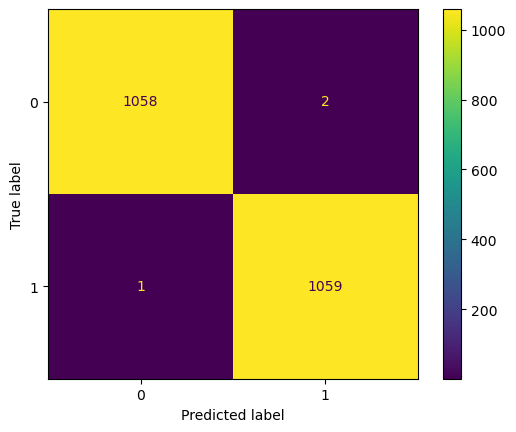

In [29]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

random_seed = 42

lgbm = LGBMClassifier(random_state=random_seed)
lgbm.fit(X_train_transformed, y_train_transformed)
print('Accuracy of LGBM classifier on training set: {:.4f}'.format(lgbm.score(X_train_transformed, y_train_transformed)))
print('Accuracy of LGBM classifier on test set: {:.4f}'.format(lgbm.score(X_test_transformed, y_test_transformed)))

pred = lgbm.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, lgbm.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm.classes_)
disp.plot()

plt.show()


In [30]:
acc_train1_LBGM = lgbm.score(X_train_transformed, y_train_transformed)
acc_test1_LBGM = lgbm.score(X_test_transformed, y_test_transformed)

#### Cross validation for hyperparameter tuning

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
param_grid = {'num_leaves': [31, 63, 127],
              'learning_rate': [0.1, 0.01, 0.001],
              'n_estimators': [100, 500, 1000]
             }

In [33]:
grid_search = GridSearchCV(lgbm, param_grid, cv=5)
grid_search.fit(X_train_transformed, y_train_transformed)

GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [100, 500, 1000],
                         'num_leaves': [31, 63, 127]})

In [34]:
print("Best parameters found: ",grid_search.best_params_)

Best parameters found:  {'learning_rate': 0.1, 'n_estimators': 1000, 'num_leaves': 31}


In [35]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,param_num_leaves,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.68,0.06,0.01,0.00,0.1,1000,31,"{'learning_rate': 0.1, 'n_estimators': 1000, '...",1.00,0.99,1.00,1.00,1.00,1.00,0.00,1
4,0.56,0.06,0.01,0.00,0.1,500,63,"{'learning_rate': 0.1, 'n_estimators': 500, 'n...",1.00,0.99,0.99,1.00,1.00,1.00,0.00,2
5,1.41,0.30,0.01,0.00,0.1,500,127,"{'learning_rate': 0.1, 'n_estimators': 500, 'n...",1.00,0.99,1.00,1.00,1.00,1.00,0.00,2


In [36]:
# grid_search.predict(x_test)

#### Re-run model

Accuracy of LBGM classifier on training set: 1.0000
Accuracy of LBGM classifier on test set: 0.9972
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1060
           1       1.00      1.00      1.00      1060

    accuracy                           1.00      2120
   macro avg       1.00      1.00      1.00      2120
weighted avg       1.00      1.00      1.00      2120



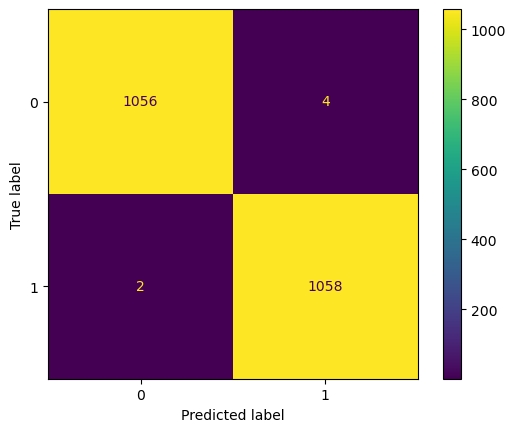

In [37]:
print('Accuracy of LBGM classifier on training set: {:.4f}'.format(grid_search.score(X_train_transformed, y_train_transformed)))
print('Accuracy of LBGM classifier on test set: {:.4f}'.format(grid_search.score(X_test_transformed, y_test_transformed)))

pred = grid_search.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, grid_search.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

plt.show()

In [38]:
acc_train2_LBGM = grid_search.score(X_train_transformed, y_train_transformed)
acc_test2_LBGM = grid_search.score(X_test_transformed, y_test_transformed)

#### Feature importance

In [39]:
importances = lgbm.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]
feature_names = data_resampled.columns[1:]
names = [feature_names[i] for i in indices]

importance_df = pd.DataFrame({'feature_name': feature_names, 'importance': importances})

# Sort the dataframe by importance
importance_df.sort_values(by='importance', ascending=False, inplace=True)

# Print the top 10 features
print(importance_df.head(10))

fi_LGBM = importance_df

          feature_name  importance
22              Extent         409
33         Ellipticity         391
12          Sphericity         320
24           Curvature         240
4              ELength         162
13           L/T Ratio         160
0                   Dp         149
25        Surface Area         133
30  CHull Surface Area         108
2              FLength          72


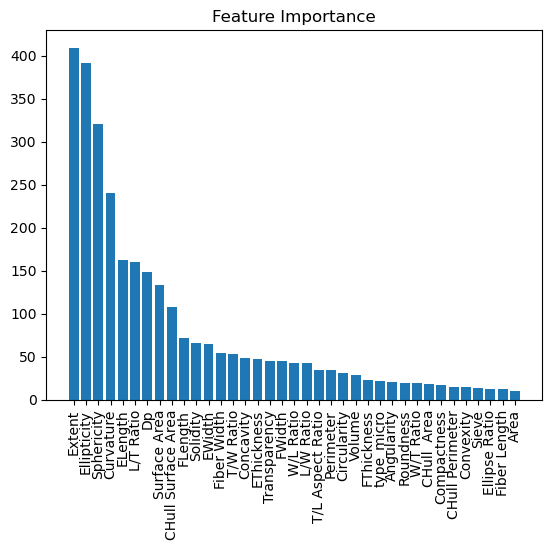

In [40]:
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

### AdaBoost (Adaptive Boosting)

#### Train-test split

In [41]:
# machine learning libs
from sklearn.model_selection import train_test_split

class_column = ['type_micro']
random_seed = 42

features = data_resampled.drop(columns=class_column)
target = data_resampled[class_column]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    random_state=random_seed, 
                                                    stratify=data_resampled[class_column])

In [42]:
# # X Train
# print('On X train: ')
# print('X train dimensions: ', X_train.shape)
# display(X_train.head())

# # X test
# print('\nOn X test: ')
# print('X test dimensions: ', X_test.shape)
# display(X_test.head())

In [43]:
# # X Train
# print('On y train: ')
# print('y train dimensions: ', y_train.shape)
# display(y_train.head())

# # X test
# print('\nOn y test: ')
# print('y test dimensions: ', y_test.shape)
# display(y_test.head())

#### Data Preprocessing - Imputation
Not needed for imputation for this data

In [44]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# # fill missing values with medians
# imputer = SimpleImputer(strategy='median')
# X_train_transformed = imputer.fit_transform(X_train)
# scale the data
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)

# apply imputer and scaler to test data. But here we will not apply the
# fit method because we do not want the model to learn anything from the test data!
# X_test_transformed = imputer.transform(X_test)
X_test_transformed = scale.transform(X_test)

# Encode the target as well since it's categorical - we can also transform the target column using pandas
le = LabelEncoder()
le.fit(y_train)
y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)
le.classes_

array(['lithic', 'soil'], dtype=object)

#### Modeling

Accuracy of LGBM classifier on training set: 0.9978
Accuracy of LGBM classifier on test set: 0.9967
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1060
           1       1.00      1.00      1.00      1060

    accuracy                           1.00      2120
   macro avg       1.00      1.00      1.00      2120
weighted avg       1.00      1.00      1.00      2120



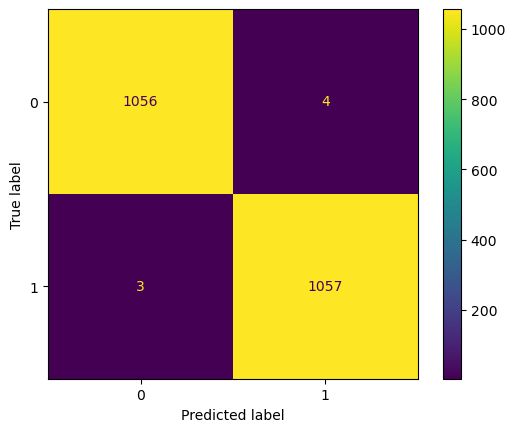

In [45]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

random_seed = 42

ada = AdaBoostClassifier(random_state=random_seed)
ada.fit(X_train_transformed, y_train_transformed)
print('Accuracy of LGBM classifier on training set: {:.4f}'.format(ada.score(X_train_transformed, y_train_transformed)))
print('Accuracy of LGBM classifier on test set: {:.4f}'.format(ada.score(X_test_transformed, y_test_transformed)))

pred = ada.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, ada.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ada.classes_)
disp.plot()

plt.show()

In [46]:
acc_train1_ada = ada.score(X_train_transformed, y_train_transformed)
acc_test1_ada = ada.score(X_test_transformed, y_test_transformed)

#### Cross validation for hyperparameter tuning

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
param_grid = {'n_estimators': [50, 100, 150],
              'learning_rate': [0.1, 0.5, 1.0],
              'algorithm': ['SAMME', 'SAMME.R']}

In [49]:
grid_search = GridSearchCV(ada, param_grid, cv=5)
grid_search.fit(X_train_transformed, y_train_transformed)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 150]})

In [50]:
print("Best parameters found: ",grid_search.best_params_)

Best parameters found:  {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 150}


In [51]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,2.14,0.02,0.04,0.00,SAMME.R,1.0,150,"{'algorithm': 'SAMME.R', 'learning_rate': 1.0,...",1.00,0.99,1.00,1.00,1.00,1.00,0.00,1
14,2.14,0.03,0.04,0.00,SAMME.R,0.5,150,"{'algorithm': 'SAMME.R', 'learning_rate': 0.5,...",1.00,0.99,0.99,1.00,1.00,1.00,0.00,2
16,1.42,0.00,0.03,0.00,SAMME.R,1.0,100,"{'algorithm': 'SAMME.R', 'learning_rate': 1.0,...",1.00,0.99,1.00,1.00,1.00,1.00,0.00,3


In [52]:
# grid_search.predict(x_test)

#### Re-run model

Accuracy of AdaBoost classifier on training set: 1.0000
Accuracy of AdaBoost classifier on test set: 0.9976
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1060
           1       1.00      1.00      1.00      1060

    accuracy                           1.00      2120
   macro avg       1.00      1.00      1.00      2120
weighted avg       1.00      1.00      1.00      2120



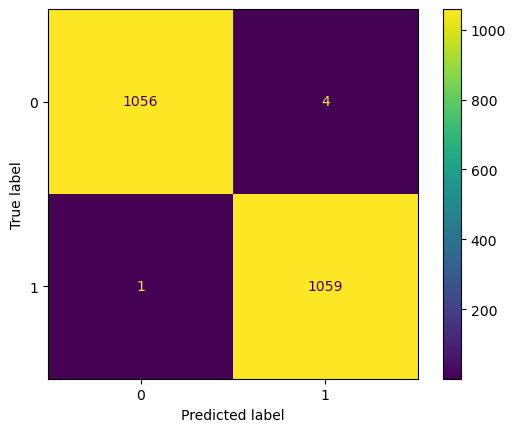

In [53]:
print('Accuracy of AdaBoost classifier on training set: {:.4f}'.format(grid_search.score(X_train_transformed, y_train_transformed)))
print('Accuracy of AdaBoost classifier on test set: {:.4f}'.format(grid_search.score(X_test_transformed, y_test_transformed)))

pred = grid_search.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, grid_search.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

plt.show()

In [54]:
acc_train2_ada = grid_search.score(X_train_transformed, y_train_transformed)
acc_test2_ada = grid_search.score(X_test_transformed, y_test_transformed)

#### Feature importance

In [55]:
importances = ada.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]
feature_names = data_resampled.columns[1:]
names = [feature_names[i] for i in indices]

importance_df = pd.DataFrame({'feature_name': feature_names, 'importance': importances})

# Sort the dataframe by importance
importance_df.sort_values(by='importance', ascending=False, inplace=True)

# Print the top 10 features
print(importance_df.head(10))

fi_ada = importance_df

    feature_name  importance
22        Extent        0.16
33   Ellipticity        0.16
12    Sphericity        0.10
24     Curvature        0.10
4        ELength        0.08
29     T/W Ratio        0.06
26     L/W Ratio        0.06
13     L/T Ratio        0.06
23  Transparency        0.04
25  Surface Area        0.04


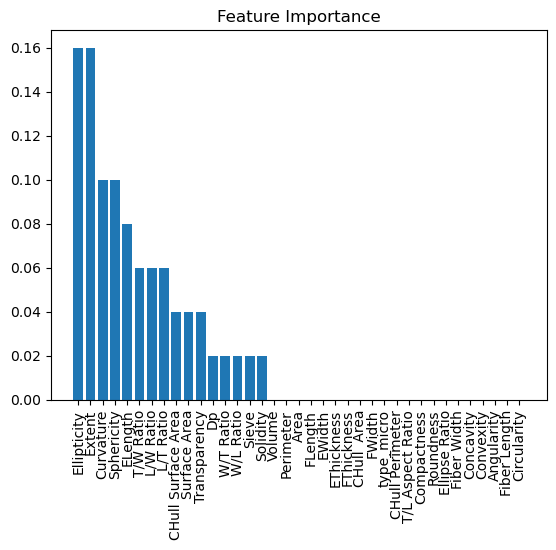

In [56]:
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

### Random forest

#### Train-test split

In [57]:
# machine learning libs
from sklearn.model_selection import train_test_split

class_column = ['type_micro']
random_seed = 42

features = data_resampled.drop(columns=class_column)
target = data_resampled[class_column]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    random_state=random_seed, 
                                                    stratify=data_resampled[class_column])

X_holdout = X_test
y_holdout = y_test

In [58]:
# # X Train
# print('On X train: ')
# print('X train dimensions: ', X_train.shape)
# display(X_train.head())

# # X test
# print('\nOn X test: ')
# print('X test dimensions: ', X_test.shape)
# display(X_test.head())

In [59]:
# # X Train
# print('On y train: ')
# print('y train dimensions: ', y_train.shape)
# display(y_train.head())

# # X test
# print('\nOn y test: ')
# print('y test dimensions: ', y_test.shape)
# display(y_test.head())

#### Data Preprocessing - Imputation
Not needed for imputation for this data

In [60]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# # fill missing values with medians
# imputer = SimpleImputer(strategy='median')
# X_train_transformed = imputer.fit_transform(X_train)
# scale the data
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)

# apply imputer and scaler to test data. But here we will not apply the
# fit method because we do not want the model to learn anything from the test data!
# X_test_transformed = imputer.transform(X_test)
X_test_transformed = scale.transform(X_test)

# Encode the target as well since it's categorical - we can also transform the target column using pandas
le = LabelEncoder()
le.fit(y_train)
y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)
le.classes_

array(['lithic', 'soil'], dtype=object)

#### Modeling

Accuracy of RF classifier on training set: 1.0000
Accuracy of RF classifier on test set: 0.9934
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1060
           1       0.99      1.00      0.99      1060

    accuracy                           0.99      2120
   macro avg       0.99      0.99      0.99      2120
weighted avg       0.99      0.99      0.99      2120



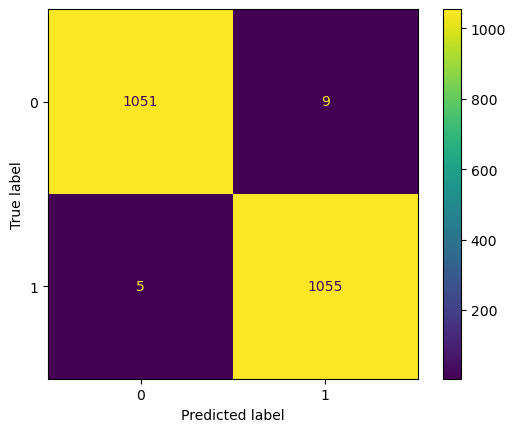

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

random_seed = 42

rf = RandomForestClassifier(random_state=random_seed)
rf.fit(X_train_transformed, y_train_transformed)
print('Accuracy of RF classifier on training set: {:.4f}'.format(rf.score(X_train_transformed, y_train_transformed)))
print('Accuracy of RF classifier on test set: {:.4f}'.format(rf.score(X_test_transformed, y_test_transformed)))

pred = rf.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, rf.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()

plt.show()

In [62]:
acc_train1_rf = rf.score(X_train_transformed, y_train_transformed)
acc_test1_rf = rf.score(X_test_transformed, y_test_transformed)

#### Cross validation for hyperparameter tuning

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
param_grid = {'n_estimators': [10, 50, 100],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10]}
#               'min_samples_leaf': [1, 2, 4],
#               'max_features': ['auto', 'sqrt', 'log2'],
#               'max_leaf_nodes': [10, 20, 30],
#               'class_weight':[None, 'balanced'],
#               'criterion': ['gini', 'entropy']}

In [65]:
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_test_transformed, y_test_transformed)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]})

In [66]:
print("Best parameters found: ",grid_search.best_params_)

Best parameters found:  {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}


In [67]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,0.32,0.01,0.01,0.00,None,5,100,"{'max_depth': None, 'min_samples_split': 5, 'n...",1.00,0.98,0.99,0.99,0.99,0.99,0.01,1
4,0.16,0.00,0.01,0.00,None,5,50,"{'max_depth': None, 'min_samples_split': 5, 'n...",1.00,0.98,0.99,0.98,0.99,0.99,0.01,2
7,0.16,0.00,0.01,0.00,None,10,50,"{'max_depth': None, 'min_samples_split': 10, '...",1.00,0.98,0.99,0.99,0.99,0.99,0.01,2


#### Re-run model

Accuracy of Random Forest classifier on training set: 0.9877
Accuracy of Random Forest classifier on test set: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1060
           1       1.00      1.00      1.00      1060

    accuracy                           1.00      2120
   macro avg       1.00      1.00      1.00      2120
weighted avg       1.00      1.00      1.00      2120



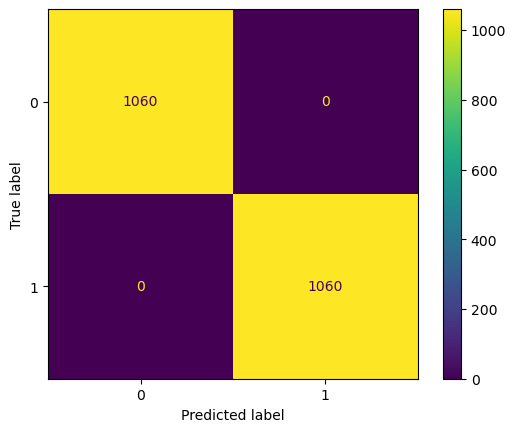

In [68]:
print('Accuracy of Random Forest classifier on training set: {:.4f}'.format(grid_search.score(X_train_transformed, y_train_transformed)))
print('Accuracy of Random Forest classifier on test set: {:.4f}'.format(grid_search.score(X_test_transformed, y_test_transformed)))

pred = grid_search.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, grid_search.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

plt.show()

In [69]:
acc_train2_rf = grid_search.score(X_train_transformed, y_train_transformed)
acc_test2_rf = grid_search.score(X_test_transformed, y_test_transformed)

#### Feature importance

In [70]:
importances = rf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]
feature_names = data_resampled.columns[1:]
names = [feature_names[i] for i in indices]

importance_df = pd.DataFrame({'feature_name': feature_names, 'importance': importances})

# Sort the dataframe by importance
importance_df.sort_values(by='importance', ascending=False, inplace=True)

# Print the top 10 features
print(importance_df.head(10))

fi_rf = importance_df

          feature_name  importance
30  CHull Surface Area        0.16
29           T/W Ratio        0.12
25        Surface Area        0.09
2              FLength        0.05
4              ELength        0.05
7               Volume        0.05
33         Ellipticity        0.04
6               EWidth        0.04
19            Solidity        0.03
26           L/W Ratio        0.03


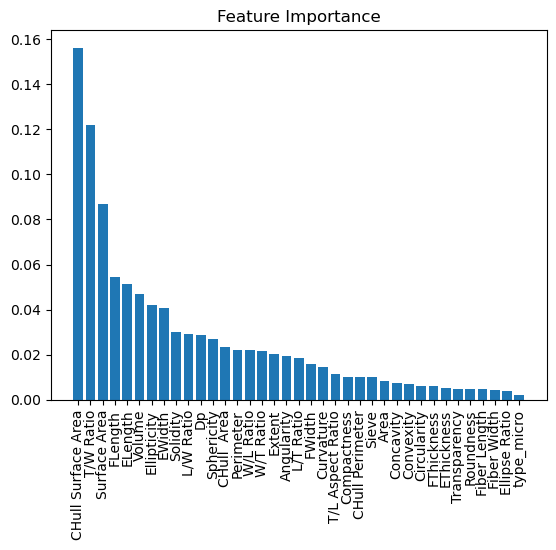

In [71]:
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

### Bagging (Bootstrapped Aggregation)

#### Train-test split

In [72]:
# machine learning libs
from sklearn.model_selection import train_test_split

class_column = ['type_micro']
random_seed = 42

features = data_resampled.drop(columns=class_column)
target = data_resampled[class_column]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    random_state=random_seed, 
                                                    stratify=data_resampled[class_column])

In [73]:
# # X Train
# print('On X train: ')
# print('X train dimensions: ', X_train.shape)
# display(X_train.head())

# # X test
# print('\nOn X test: ')
# print('X test dimensions: ', X_test.shape)
# display(X_test.head())

In [74]:
# # X Train
# print('On y train: ')
# print('y train dimensions: ', y_train.shape)
# display(y_train.head())

# # X test
# print('\nOn y test: ')
# print('y test dimensions: ', y_test.shape)
# display(y_test.head())

#### Data Preprocessing - Imputation
Not needed for imputation for this data

In [75]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# # fill missing values with medians
# imputer = SimpleImputer(strategy='median')
# X_train_transformed = imputer.fit_transform(X_train)
# scale the data
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)

# apply imputer and scaler to test data. But here we will not apply the
# fit method because we do not want the model to learn anything from the test data!
# X_test_transformed = imputer.transform(X_test)
X_test_transformed = scale.transform(X_test)

# Encode the target as well since it's categorical - we can also transform the target column using pandas
le = LabelEncoder()
le.fit(y_train)
y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)
le.classes_

array(['lithic', 'soil'], dtype=object)

#### Modeling

Accuracy of LGBM classifier on training set: 0.9791
Accuracy of LGBM classifier on test set: 0.9750
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1060
           1       0.98      0.97      0.97      1060

    accuracy                           0.97      2120
   macro avg       0.98      0.97      0.97      2120
weighted avg       0.98      0.97      0.97      2120



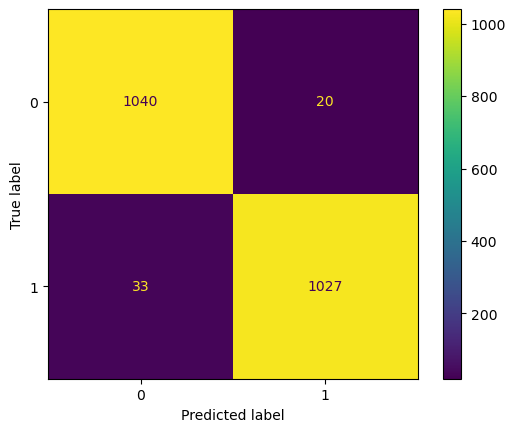

In [76]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

random_seed = 42

base_estimator = DecisionTreeClassifier(max_depth=4, random_state=random_seed)
bagging = BaggingClassifier(base_estimator=base_estimator, random_state=random_seed)
bagging.fit(X_train_transformed, y_train_transformed)
print('Accuracy of LGBM classifier on training set: {:.4f}'.format(bagging.score(X_train_transformed, y_train_transformed)))
print('Accuracy of LGBM classifier on test set: {:.4f}'.format(bagging.score(X_test_transformed, y_test_transformed)))

pred = bagging.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, bagging.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bagging.classes_)
disp.plot()

plt.show()

In [77]:
acc_train1_bagging = bagging.score(X_train_transformed, y_train_transformed)
acc_test1_bagging = bagging.score(X_test_transformed, y_test_transformed)

#### Cross validation for hyperparameter tuning

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
param_grid = {'n_estimators': [50, 100, 150],
              'max_samples': [0.5, 1.0, 2.0],
              'max_features': [0.5, 1.0, 2.0]}

In [80]:
grid_search = GridSearchCV(bagging, param_grid, cv=5)
grid_search.fit(X_train_transformed, y_train_transformed)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                                               random_state=42),
                                         random_state=42),
             param_grid={'max_features': [0.5, 1.0, 2.0],
                         'max_samples': [0.5, 1.0, 2.0],
                         'n_estimators': [50, 100, 150]})

In [81]:
print("Best parameters found: ",grid_search.best_params_)

Best parameters found:  {'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 50}


In [82]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,1.16,0.03,0.02,0.01,1.0,0.5,50,"{'max_features': 1.0, 'max_samples': 0.5, 'n_e...",0.98,0.97,0.98,0.98,0.97,0.98,0.00,1
11,3.42,0.14,0.04,0.00,1.0,0.5,150,"{'max_features': 1.0, 'max_samples': 0.5, 'n_e...",0.98,0.97,0.98,0.98,0.97,0.98,0.00,2
10,2.32,0.05,0.04,0.01,1.0,0.5,100,"{'max_features': 1.0, 'max_samples': 0.5, 'n_e...",0.98,0.97,0.98,0.98,0.97,0.98,0.00,3


In [83]:
# grid_search.predict(x_test)

#### Re-run model

Accuracy of Bagging classifier on training set: 0.9802
Accuracy of Bagging classifie on test set: 0.9778
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1060
           1       0.98      0.97      0.98      1060

    accuracy                           0.98      2120
   macro avg       0.98      0.98      0.98      2120
weighted avg       0.98      0.98      0.98      2120



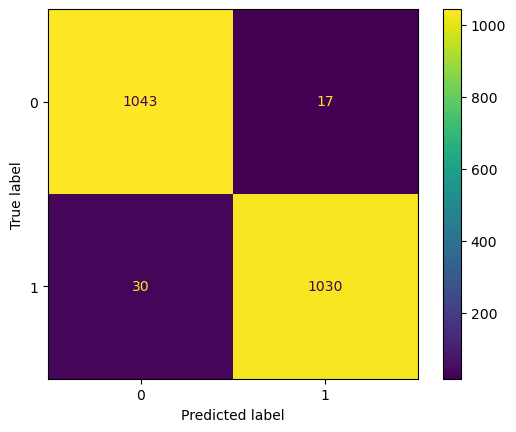

In [84]:
print('Accuracy of Bagging classifier on training set: {:.4f}'.format(grid_search.score(X_train_transformed, y_train_transformed)))
print('Accuracy of Bagging classifie on test set: {:.4f}'.format(grid_search.score(X_test_transformed, y_test_transformed)))

pred = grid_search.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, grid_search.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

plt.show()

In [85]:
acc_train2_bagging = grid_search.score(X_train_transformed, y_train_transformed)
acc_test2_bagging = grid_search.score(X_test_transformed, y_test_transformed)

#### Feature importance

In [86]:
# importances = bagging.feature_importances_

# # Sort the feature importances in descending order
# indices = np.argsort(importances)[::-1]
# feature_names = data_resampled.columns[1:]
# names = [feature_names[i] for i in indices]

# importance_df = pd.DataFrame({'feature_name': feature_names, 'importance': importances})

# # Sort the dataframe by importance
# importance_df.sort_values(by='importance', ascending=False, inplace=True)

# # Print the top 10 features
# print(importance_df.head(10))

# fi_bagging = importance_df

In [87]:
# # Create plot
# plt.figure()

# # Create plot title
# plt.title("Feature Importance")

# # Add bars
# plt.bar(range(X_train.shape[1]), importances[indices])

# # Add feature names as x-axis labels
# plt.xticks(range(X_train.shape[1]), names, rotation=90)

# # Show plot
# plt.show()

### Extra trees

#### Train-test split

In [88]:
# machine learning libs
from sklearn.model_selection import train_test_split

class_column = ['type_micro']
random_seed = 42

features = data_resampled.drop(columns=class_column)
target = data_resampled[class_column]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    random_state=random_seed, 
                                                    stratify=data_resampled[class_column])

X_holdout = X_test
y_holdout = y_test

In [89]:
# # X Train
# print('On X train: ')
# print('X train dimensions: ', X_train.shape)
# display(X_train.head())

# # X test
# print('\nOn X test: ')
# print('X test dimensions: ', X_test.shape)
# display(X_test.head())

In [90]:
# # X Train
# print('On y train: ')
# print('y train dimensions: ', y_train.shape)
# display(y_train.head())

# # X test
# print('\nOn y test: ')
# print('y test dimensions: ', y_test.shape)
# display(y_test.head())

#### Data Preprocessing - Imputation
Not needed for imputation for this data

In [91]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# # fill missing values with medians
# imputer = SimpleImputer(strategy='median')
# X_train_transformed = imputer.fit_transform(X_train)
# scale the data
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)

# apply imputer and scaler to test data. But here we will not apply the
# fit method because we do not want the model to learn anything from the test data!
# X_test_transformed = imputer.transform(X_test)
X_test_transformed = scale.transform(X_test)

# Encode the target as well since it's categorical - we can also transform the target column using pandas
le = LabelEncoder()
le.fit(y_train)
y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)
le.classes_

array(['lithic', 'soil'], dtype=object)

#### Modeling

Accuracy of Extra Trees classifier on training set: 1.0000
Accuracy of Extra Trees classifier on test set: 0.9910
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1060
           1       0.99      1.00      0.99      1060

    accuracy                           0.99      2120
   macro avg       0.99      0.99      0.99      2120
weighted avg       0.99      0.99      0.99      2120



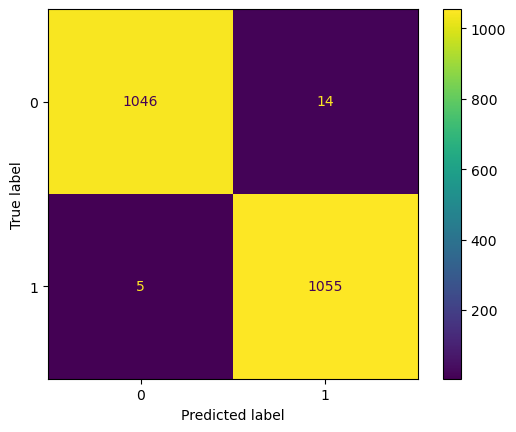

In [92]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

random_seed = 42

etree = ExtraTreesClassifier(random_state=random_seed)
etree.fit(X_train_transformed, y_train_transformed)
print('Accuracy of Extra Trees classifier on training set: {:.4f}'.format(etree.score(X_train_transformed, y_train_transformed)))
print('Accuracy of Extra Trees classifier on test set: {:.4f}'.format(etree.score(X_test_transformed, y_test_transformed)))

pred = etree.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, etree.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=etree.classes_)
disp.plot()

plt.show()

In [93]:
acc_train1_etree = etree.score(X_train_transformed, y_train_transformed)
acc_test1_etree = etree.score(X_test_transformed, y_test_transformed)

#### Cross validation for hyperparameter tuning

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
param_grid = {'n_estimators': [10, 50, 100, 150],
              'max_depth': [None, 5, 10, 20],
              'min_samples_split': [2, 5, 10]}

In [96]:
grid_search = GridSearchCV(etree, param_grid, cv=5)
grid_search.fit(X_test_transformed, y_test_transformed)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 150]})

In [97]:
print("Best parameters found: ",grid_search.best_params_)

Best parameters found:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}


In [98]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.22,0.00,0.02,0.00,None,2,150,"{'max_depth': None, 'min_samples_split': 2, 'n...",0.99,0.99,0.98,0.99,0.99,0.99,0.00,1
2,0.16,0.01,0.02,0.00,None,2,100,"{'max_depth': None, 'min_samples_split': 2, 'n...",0.99,0.99,0.98,0.99,0.99,0.99,0.00,2
38,0.15,0.00,0.01,0.00,20,2,100,"{'max_depth': 20, 'min_samples_split': 2, 'n_e...",0.99,0.99,0.98,0.99,0.99,0.99,0.00,3


#### Re-run model

Accuracy of Extra Trees classifier on training set: 0.9851
Accuracy of Extra Trees classifier on test set: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1060
           1       1.00      1.00      1.00      1060

    accuracy                           1.00      2120
   macro avg       1.00      1.00      1.00      2120
weighted avg       1.00      1.00      1.00      2120



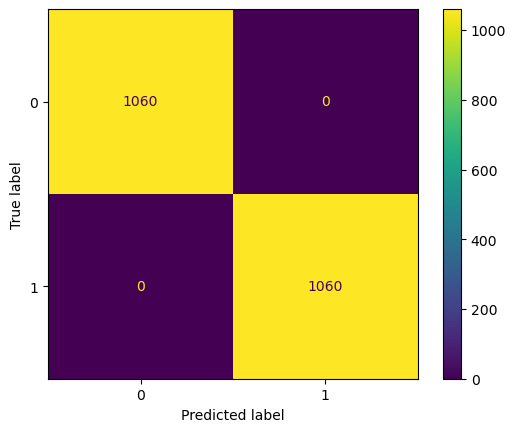

In [99]:
print('Accuracy of Extra Trees classifier on training set: {:.4f}'.format(grid_search.score(X_train_transformed, y_train_transformed)))
print('Accuracy of Extra Trees classifier on test set: {:.4f}'.format(grid_search.score(X_test_transformed, y_test_transformed)))

pred = grid_search.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, grid_search.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

plt.show()

In [100]:
acc_train2_etree = grid_search.score(X_train_transformed, y_train_transformed)
acc_test2_etree = grid_search.score(X_test_transformed, y_test_transformed)

#### Feature importance

In [101]:
importances = etree.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]
feature_names = data_resampled.columns[1:]
names = [feature_names[i] for i in indices]

importance_df = pd.DataFrame({'feature_name': feature_names, 'importance': importances})

# Sort the dataframe by importance
importance_df.sort_values(by='importance', ascending=False, inplace=True)

# Print the top 10 features
print(importance_df.head(10))

fi_etree = importance_df

          feature_name  importance
30  CHull Surface Area        0.16
29           T/W Ratio        0.09
19            Solidity        0.07
28           W/T Ratio        0.07
33         Ellipticity        0.07
13           L/T Ratio        0.05
27           W/L Ratio        0.05
22              Extent        0.03
24           Curvature        0.02
25        Surface Area        0.02


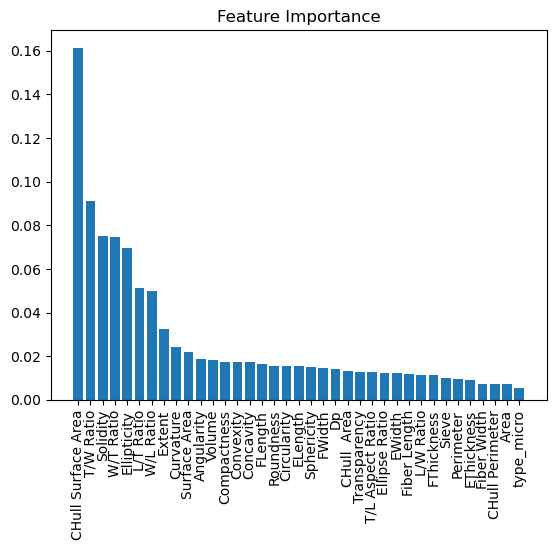

In [102]:
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

### SVC (Support Vector Classification)

#### Train-test split

In [103]:
# machine learning libs
from sklearn.model_selection import train_test_split

class_column = ['type_micro']
random_seed = 42

features = data_resampled.drop(columns=class_column)
target = data_resampled[class_column]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    random_state=random_seed, 
                                                    stratify=data_resampled[class_column])

In [104]:
# # X Train
# print('On X train: ')
# print('X train dimensions: ', X_train.shape)
# display(X_train.head())

# # X test
# print('\nOn X test: ')
# print('X test dimensions: ', X_test.shape)
# display(X_test.head())

In [105]:
# # X Train
# print('On y train: ')
# print('y train dimensions: ', y_train.shape)
# display(y_train.head())

# # X test
# print('\nOn y test: ')
# print('y test dimensions: ', y_test.shape)
# display(y_test.head())

#### Data Preprocessing - Imputation
Not needed for imputation for this data

In [106]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# # fill missing values with medians
# imputer = SimpleImputer(strategy='median')
# X_train_transformed = imputer.fit_transform(X_train)
# scale the data
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)

# apply imputer and scaler to test data. But here we will not apply the
# fit method because we do not want the model to learn anything from the test data!
# X_test_transformed = imputer.transform(X_test)
X_test_transformed = scale.transform(X_test)

# Encode the target as well since it's categorical - we can also transform the target column using pandas
le = LabelEncoder()
le.fit(y_train)
y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)
le.classes_

array(['lithic', 'soil'], dtype=object)

#### Modeling

Accuracy of LR classifier on training set: 0.9855
Accuracy of LR classifier on test set: 0.9887
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1060
           1       0.99      0.99      0.99      1060

    accuracy                           0.99      2120
   macro avg       0.99      0.99      0.99      2120
weighted avg       0.99      0.99      0.99      2120



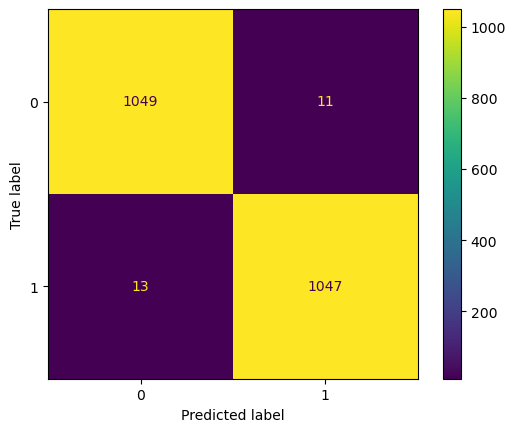

In [107]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

random_seed = 42

svc = SVC(random_state=random_seed)
svc.fit(X_train_transformed, y_train_transformed)
print('Accuracy of LR classifier on training set: {:.4f}'.format(svc.score(X_train_transformed, y_train_transformed)))
print('Accuracy of LR classifier on test set: {:.4f}'.format(svc.score(X_test_transformed, y_test_transformed)))

pred = svc.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, svc.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()

plt.show()

In [108]:
acc_train1_svc = svc.score(X_train_transformed, y_train_transformed)
acc_test1_svc = svc.score(X_test_transformed, y_test_transformed)

#### Cross validation for hyperparameter tuning

In [109]:
from sklearn.model_selection import GridSearchCV

In [110]:
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf', 'poly'],
              'gamma': [0.01, 0.1, 1]}

In [111]:
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X_test_transformed, y_test_transformed)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [112]:
print("Best parameters found: ",grid_search.best_params_)

Best parameters found:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [113]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
22,0.03,0.00,0.02,0.00,10,0.1,rbf,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.99,0.98,0.99,0.98,0.99,0.99,0.00,1
19,0.02,0.00,0.01,0.00,10,0.01,rbf,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}",0.98,0.98,1.00,0.98,0.99,0.99,0.01,2
23,0.03,0.01,0.00,0.00,10,0.1,poly,"{'C': 10, 'gamma': 0.1, 'kernel': 'poly'}",0.98,0.97,0.99,0.98,0.97,0.98,0.01,3


In [114]:
# grid_search.predict(x_test)

#### Re-run model

Accuracy of SV classifier on training set: 0.9838
Accuracy of SV classifie on test set: 0.9948
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1060
           1       0.99      1.00      0.99      1060

    accuracy                           0.99      2120
   macro avg       0.99      0.99      0.99      2120
weighted avg       0.99      0.99      0.99      2120



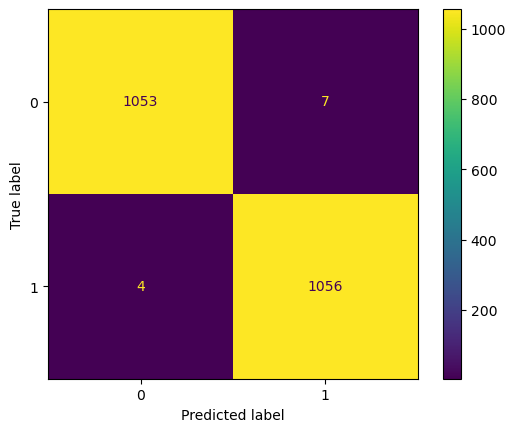

In [115]:
print('Accuracy of SV classifier on training set: {:.4f}'.format(grid_search.score(X_train_transformed, y_train_transformed)))
print('Accuracy of SV classifie on test set: {:.4f}'.format(grid_search.score(X_test_transformed, y_test_transformed)))

pred = grid_search.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, grid_search.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

plt.show()

In [116]:
acc_train2_svc = grid_search.score(X_train_transformed, y_train_transformed)
acc_test2_svc = grid_search.score(X_test_transformed, y_test_transformed)

#### Feature importance

In [117]:
# importances = svc.feature_importances_

# # Sort the feature importances in descending order
# indices = np.argsort(importances)[::-1]
# feature_names = data_resampled.columns[1:]
# names = [feature_names[i] for i in indices]

# importance_df = pd.DataFrame({'feature_name': feature_names, 'importance': importances})

# # Sort the dataframe by importance
# importance_df.sort_values(by='importance', ascending=False, inplace=True)

# # Print the top 10 features
# print(importance_df.head(10))

# fi_svc = importance_df

In [118]:
# # Create plot
# plt.figure()

# # Create plot title
# plt.title("Feature Importance")

# # Add bars
# plt.bar(range(X_train.shape[1]), importances[indices])

# # Add feature names as x-axis labels
# plt.xticks(range(X_train.shape[1]), names, rotation=90)

# # Show plot
# plt.show()

In [119]:
### XGBoost

In [120]:
### Gradient Boosting

## Visualizations

### Model accuracies

In [121]:
df = {'model': ['LightGBM', 'AdaBoost', 'Random Forest', 'Bagging', 'Extra Trees', 'SVC'], 
            'train_accuracy': [acc_train1_LBGM, acc_train1_ada, acc_train1_rf, acc_train1_bagging, acc_train1_etree, acc_train1_svc], 
            'test_accuracy': [acc_test1_LBGM, acc_test1_ada, acc_test1_rf, acc_test1_bagging, acc_test1_etree, acc_test1_svc],
            'train_accuracy_CV': [acc_train2_LBGM, acc_train2_ada, acc_train2_rf, acc_train2_bagging, acc_train2_etree, acc_train2_svc], 
            'test_accuracy_CV': [acc_test2_LBGM, acc_test2_ada, acc_test2_rf, acc_test2_bagging, acc_test1_etree, acc_test2_svc]}

accuracy = pd.DataFrame(df)


In [122]:
df = pd.DataFrame(df)
df

,model,train_accuracy,test_accuracy,train_accuracy_CV,test_accuracy_CV
0,LightGBM,1.00,1.00,1.00,1.00
1,AdaBoost,1.00,1.00,1.00,1.00
2,Random Forest,1.00,0.99,0.99,1.00
3,Bagging,0.98,0.97,0.98,0.98
4,Extra Trees,1.00,0.99,0.99,0.99
5,SVC,0.99,0.99,0.98,0.99


In [143]:
df.to_csv("accuracy_0.125mm_under.csv")

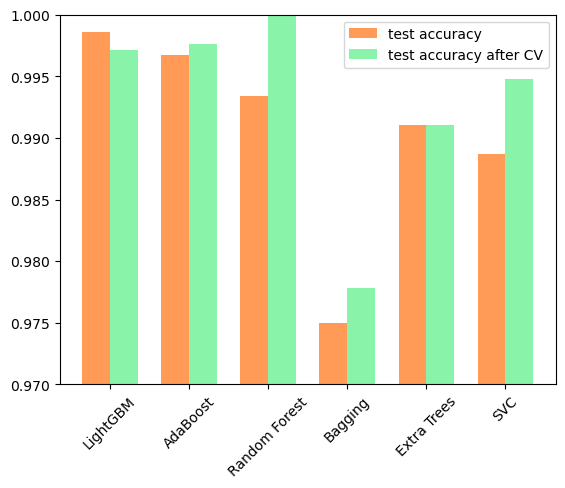

In [123]:
bar_width = 0.35

models = np.arange(len(df['model']))

plt.bar(models - bar_width/2, df['test_accuracy'], bar_width, 
        color='#FF8F45', label='test accuracy', alpha=0.9)
plt.bar(models + bar_width/2, df['test_accuracy_CV'], bar_width, 
        color='#7CF3A0', label='test accuracy after CV', alpha=0.9)

# for i, v in enumerate(df['test_accuracy']):
#     plt.text(i - bar_width/2, v + 0.01, format(v, '.4f'), ha='center', va='bottom')

# for i, v in enumerate(df['test_accuracy_CV']):
#     plt.text(i + bar_width/2, v + 0.01, format(v, '.4f'), ha='center', va='bottom')

plt.xticks(models, df['model'])
plt.xticks(rotation = 45)
plt.ylim(0.97, 1)
plt.legend()
plt.show()

In [124]:
# acc_train1_LBGM
# acc_test1_LBGM

# acc_train1_ada
# acc_test1_ada

# acc_train1_rf
# acc_test1_rf

# acc_train1_bagging
# acc_test1_bagging

# acc_train1_svc 
# acc_test1_svc

# acc_train2_LBGM
# acc_test2_LBGM

# acc_train2_ada 
# acc_test2_ada 

# acc_train2_rf
# acc_test2_rf

# acc_train2_bagging 
# acc_test2_bagging

# acc_train2_svc
# acc_test2_svc

### Overall feature importance

In [125]:
fi_LGBM['importance'] = fi_LGBM['importance'] / fi_LGBM['importance'].sum()

In [126]:
fi_LGBM['rank'] = range(1, fi_LGBM.shape[0]+1)

In [127]:
fi_LGBM.head(5)

,feature_name,importance,rank
22,Extent,0.14,1
33,Ellipticity,0.13,2
12,Sphericity,0.11,3
24,Curvature,0.08,4
4,ELength,0.05,5


In [128]:
fi_LGBM = fi_LGBM[['feature_name','importance']]
fi_LGBM = fi_LGBM.reset_index(drop=True)

In [129]:
fi_ada['rank'] = range(1, fi_ada.shape[0]+1)

In [130]:
fi_ada.head(5)

,feature_name,importance,rank
22,Extent,0.16,1
33,Ellipticity,0.16,2
12,Sphericity,0.10,3
24,Curvature,0.10,4
4,ELength,0.08,5


In [131]:
fi_ada = fi_ada[['feature_name','importance']]
fi_ada = fi_ada.reset_index(drop=True)

In [132]:
fi_rf['rank'] = range(1, fi_rf.shape[0]+1)

In [133]:
fi_rf.head()

,feature_name,importance,rank
30,CHull Surface Area,0.16,1
29,T/W Ratio,0.12,2
25,Surface Area,0.09,3
2,FLength,0.05,4
4,ELength,0.05,5


In [134]:
fi_rf = fi_rf[['feature_name','importance']]
fi_rf = fi_rf.reset_index(drop=True)

In [135]:
fi_etree['rank'] = range(1, fi_etree.shape[0]+1)

In [136]:
fi_etree = fi_etree[['feature_name','importance']]
fi_etree = fi_etree.reset_index(drop=True)

In [137]:
fi = pd.concat([fi_LGBM, fi_ada, fi_rf, fi_etree])

In [138]:
mean_rank = fi.groupby('feature_name').mean()
mean_rank.sort_values(by='importance', ascending=False, inplace=True)

In [139]:
mean_rank.head(10)

,importance
feature_name,
Ellipticity,0.10
CHull Surface Area,0.10
Extent,0.09
T/W Ratio,0.07
Sphericity,0.06
Curvature,0.05
ELength,0.05
Surface Area,0.05
L/T Ratio,0.05


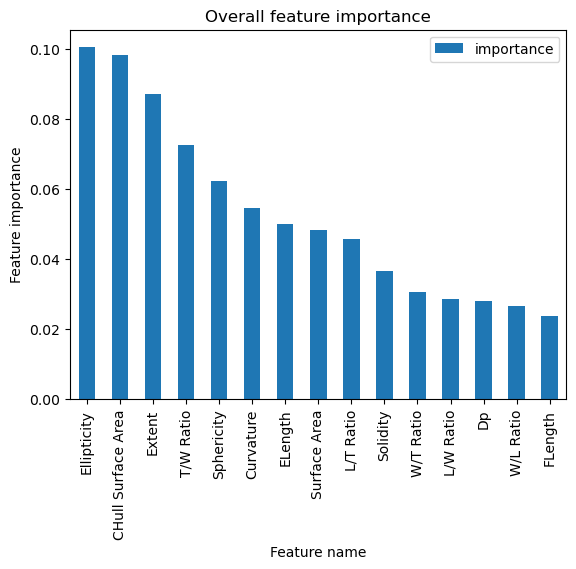

In [140]:
import matplotlib.pyplot as plt

mean_rank.reset_index(inplace=True)
mean_rank.head(15).plot(kind='bar', x='feature_name', y='importance')
plt.xlabel('Feature name')
plt.xticks(rotation = 90)
plt.ylabel('Feature importance')
plt.title('Overall feature importance')
plt.show()

In [142]:
mean_rank[['feature_name','importance']].to_csv("fi_0125mm_under.csv")